In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("e:/Nisreen/Desktop/machine learning/column_2C_weka.csv")
print(plt.style.available) 
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [10]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.8602150537634409


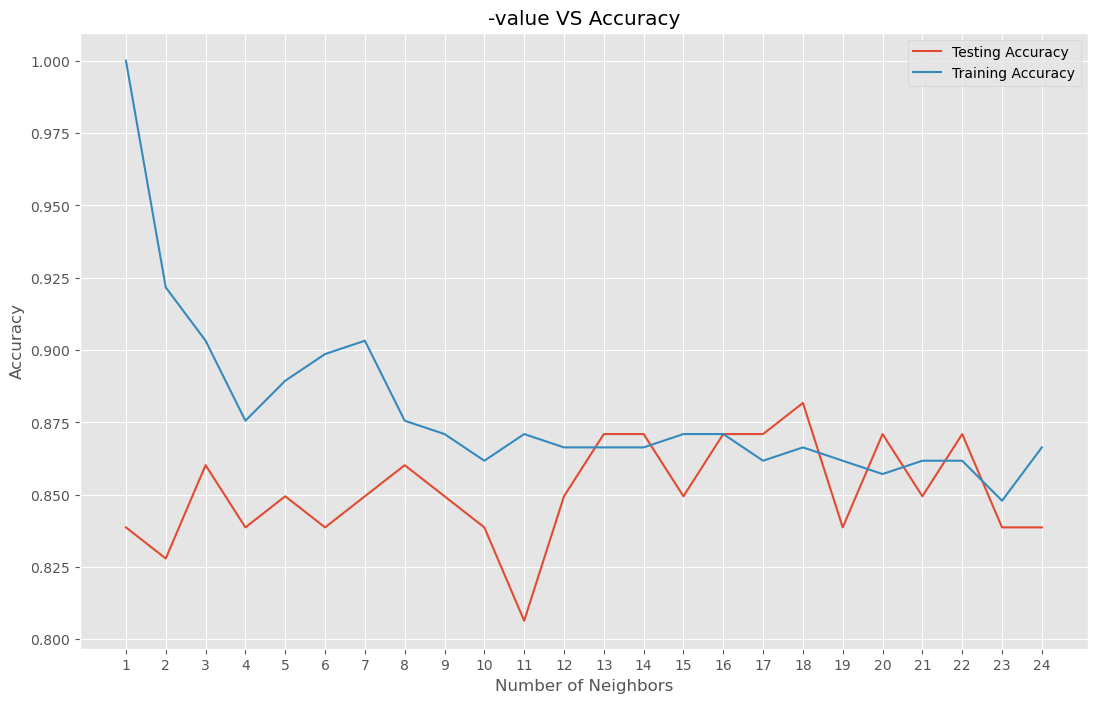

Best accuracy is 0.8817204301075269 with K = 18


In [6]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train,y_train)
    
    train_accuracy.append(knn.score(x_train, y_train))
   
    test_accuracy.append(knn.score(x_test, y_test))


plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

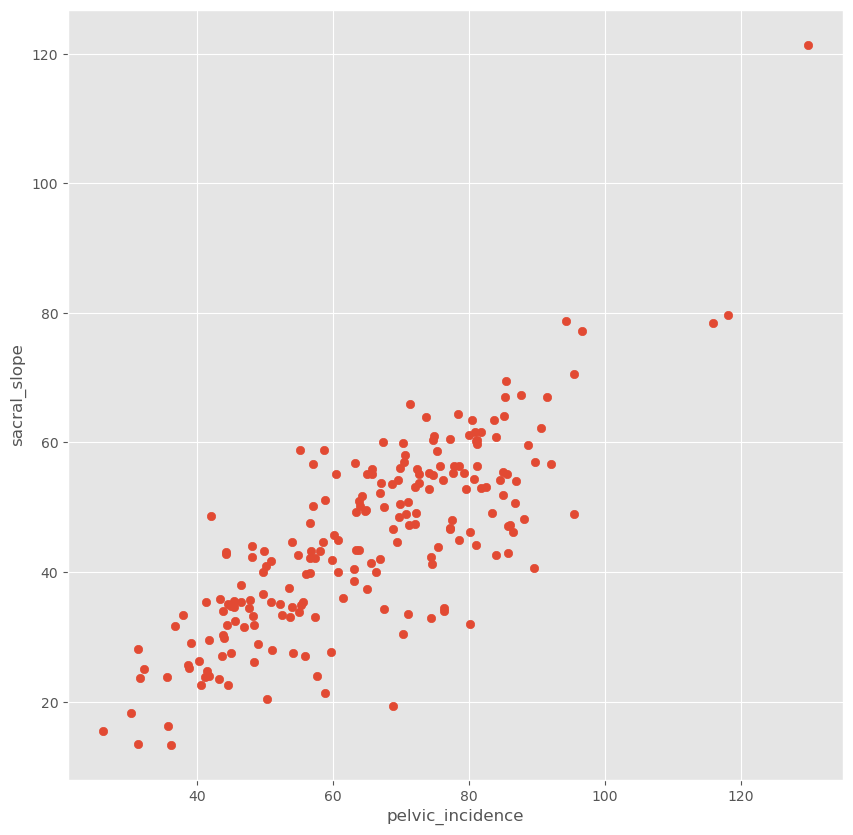

In [7]:
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)

plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score:  0.6458410481075871


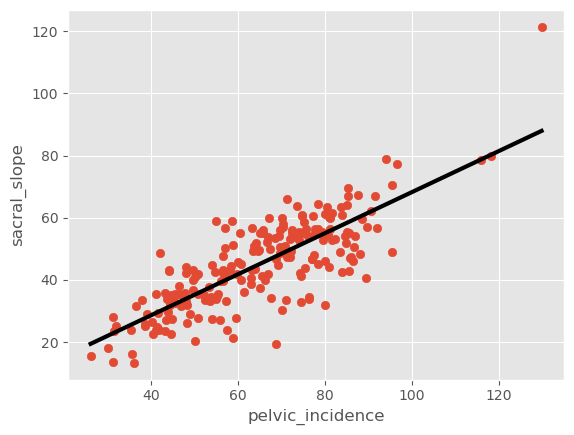

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

predict_space = np.linspace(min(x), max(x)).reshape(-1,1)

reg.fit(x,y)

predicted = reg.predict(predict_space)

print('R^2 score: ',reg.score(x, y))

plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [9]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.39314625028848693


# -----------------------------------------------(2)---------------------------------------------------------------

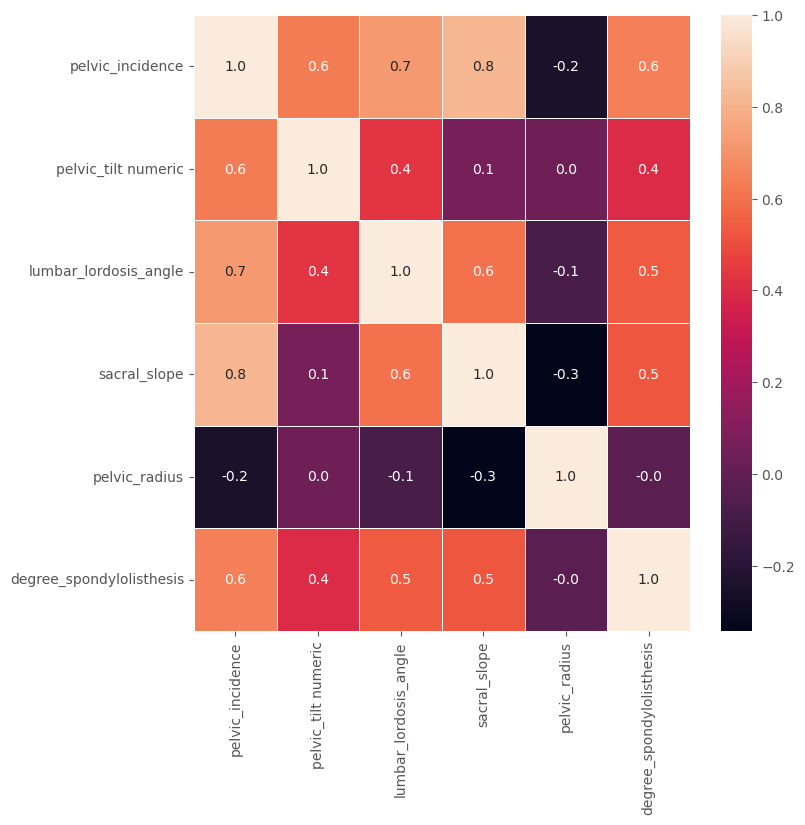

In [14]:

f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, fmt = ".1f", ax =ax)
plt.xticks(rotation = 90)
plt.show()

In [15]:


A = data[data["class"] == "Abnormal"]
N = data[data["class"] == "Normal"]



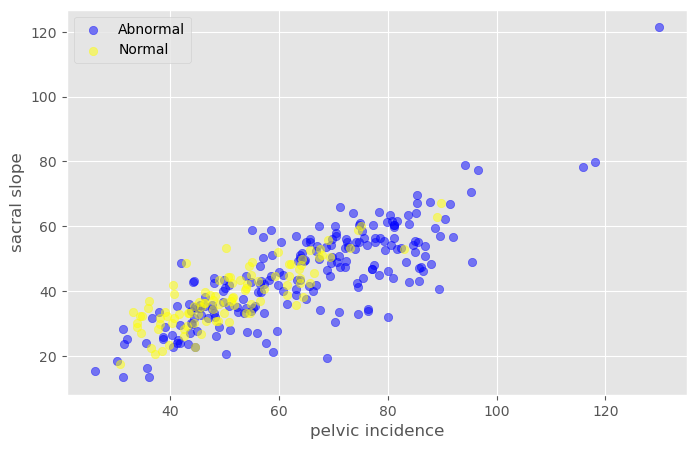

In [21]:
plt.figure(figsize = (8,5))
plt.scatter(A.pelvic_incidence, A.sacral_slope, color = "blue", alpha = 0.5, label = "Abnormal")
plt.scatter(N.pelvic_incidence, N.sacral_slope, color = "yellow", alpha = 0.5, label = "Normal")
plt.xlabel("pelvic incidence")
plt.ylabel("sacral slope")
plt.legend()
plt.show()


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("{} NN score: {} ".format(3,knn.score(x_test, y_test)))

3 NN score: 0.8602150537634409 


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

    Abnormal       0.91      0.89      0.90        66
      Normal       0.75      0.78      0.76        27

    accuracy                           0.86        93
   macro avg       0.83      0.84      0.83        93
weighted avg       0.86      0.86      0.86        93



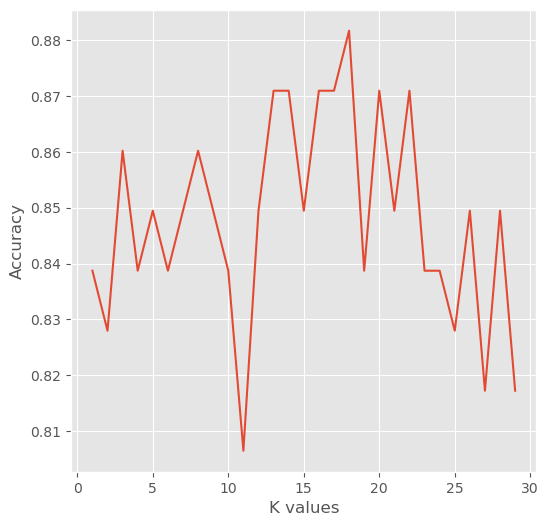

In [24]:
score_list = []
for i in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors= i)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
plt.figure(figsize = (6,6))
plt.plot(range(1,30), score_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()

In [31]:
x = data.drop(['class'], axis = 1)
y = data['class']

In [32]:
X_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(x_test.shape)

(217, 6)
(93, 6)


In [43]:

knn= KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred = knn.predict(x_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(confusion_matrix(y_test,y_pred))

[[58 11]
 [ 6 18]]


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Abnormal       0.91      0.84      0.87        69
      Normal       0.62      0.75      0.68        24

    accuracy                           0.82        93
   macro avg       0.76      0.80      0.78        93
weighted avg       0.83      0.82      0.82        93



In [51]:
error_rate = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

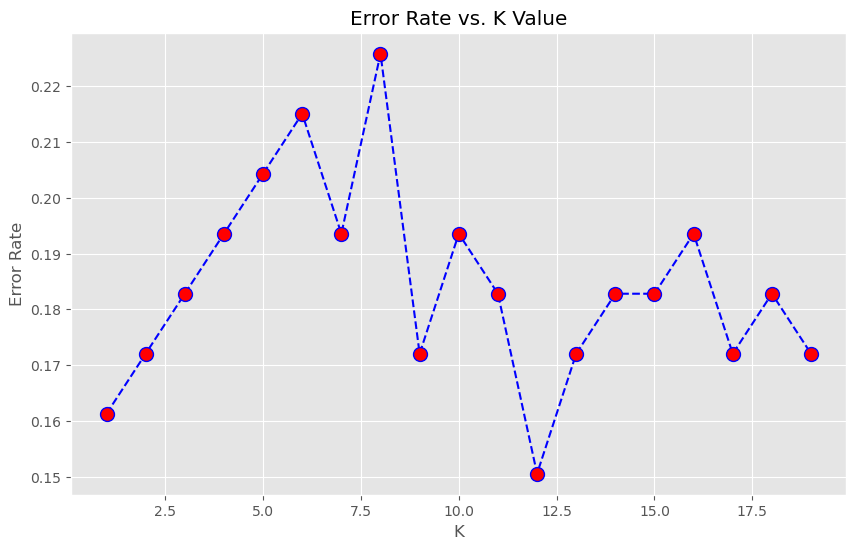

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')